<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE%20V.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


###Installing chromedriver and selenium library for downloading more than 100 images

In [3]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 6.6MB/s 
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [29.0 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [4]:
!pip install google_images_download

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=f8dfb635907644ec1ddda87d5ab602254f13715d0a3fd30fa1c819b8d250fd48
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os

In [0]:
#define and change the downlaoding path to current path
data_path = '/content/drive/My Drive/downloads'
data_path
os.chdir(data_path)

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['japanese men hair front']

In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

###Load required library

In [9]:
#dependencies (numpy, matplotlib, and keras)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from scipy.stats import norm
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Lambda, Reshape, Dropout
from keras.models import Model
from keras import backend as K





Using TensorFlow backend.


In [0]:
men_hair = "/content/drive/My Drive/downloads/"

img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")



In [11]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data

train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (455, 96, 96, 1)
Total number of test examples: (86, 96, 96, 1)


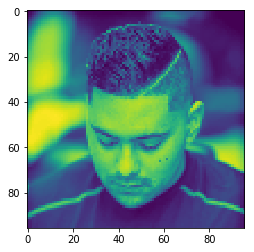

In [12]:
# First sample in the train set
plt.imshow(train_data[0].reshape(96,96))

### Normal Autoencoder

In [13]:
#input shape
input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format

#Encoder part
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Decoder part
x = Conv2DTranspose(32, (2,2),padding='same', activation='relu',strides=(2, 2))(encoded)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

W0810 12:11:55.084449 140195063269248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 12:11:55.129227 140195063269248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 12:11:55.137573 140195063269248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 12:11:55.172868 140195063269248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 12:11:55.191352 140195063269248 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
__________

In [14]:
autoencoder.fit(train_data, train_data,
                epochs=300,
                steps_per_epoch=int(len(train_data)/32),
                validation_steps=int(len(test_data)/32),
                shuffle=False,
                validation_data=(test_data, test_data), verbose=1)

Train on 455 samples, validate on 86 samples
Epoch 1/300
14/14 [==============================] - 33s 2s/step - loss: 0.6928 - val_loss: 0.6924
Epoch 2/300
14/14 [==============================] - 20s 1s/step - loss: 0.6924 - val_loss: 0.6922
Epoch 3/300
14/14 [==============================] - 20s 1s/step - loss: 0.6924 - val_loss: 0.6922
Epoch 4/300
14/14 [==============================] - 20s 1s/step - loss: 0.6923 - val_loss: 0.6922
Epoch 5/300
14/14 [==============================] - 20s 1s/step - loss: 0.6923 - val_loss: 0.6921
Epoch 6/300
14/14 [==============================] - 20s 1s/step - loss: 0.6923 - val_loss: 0.6921
Epoch 7/300
14/14 [==============================] - 20s 1s/step - loss: 0.6922 - val_loss: 0.6920
Epoch 8/300
14/14 [==============================] - 20s 1s/step - loss: 0.6921 - val_loss: 0.6919
Epoch 9/300
14/14 [==============================] - 20s 1s/step - loss: 0.6919 - val_loss: 0.6918
Epoch 10/300
14/14 [==============================] - 20s 1s/ste

In [15]:
#Performance

train_eva = autoencoder.evaluate(train_data, train_data,steps=int(len(train_data)/32), verbose=0)
print("Train loss = %f" % (train_eva*100))
test_eva = autoencoder.evaluate(test_data, test_data,steps=int(len(test_data)/32),verbose=0)
print("Test loss = %f" % (test_eva*100))

Train loss = 53.303361
Test loss = 54.300904


In [0]:
autoencoder.save('normal_autoencoder_h1')

###Prediction on test data

In [17]:
recon_imgs = autoencoder.predict(test_data, batch_size = int(len(test_data)/32), verbose=1)

86/86 [==============================] - 0s 4ms/step


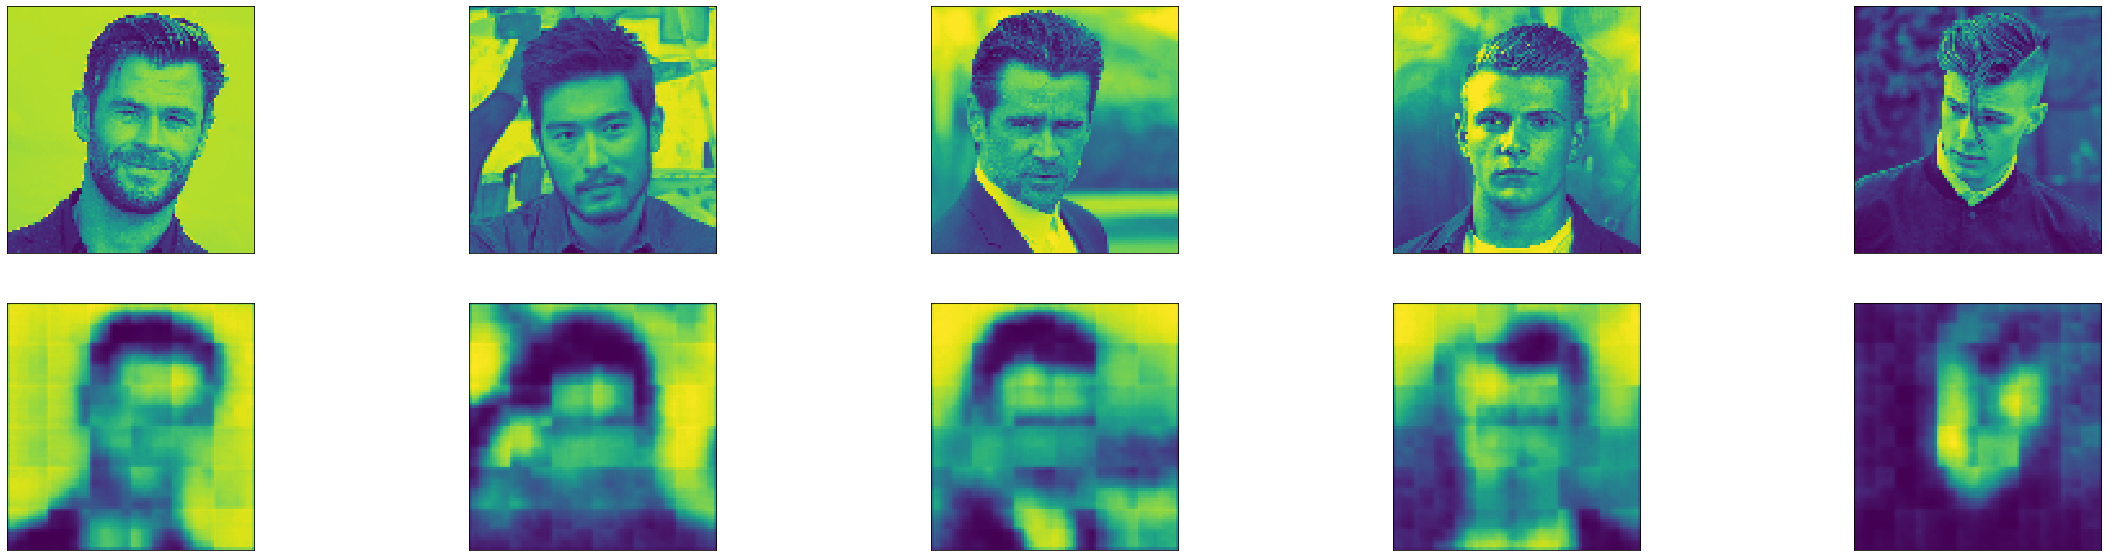

In [18]:

n = 5# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_imgs[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###Pre-processing new data set

In [19]:
tn_path = "/content/drive/My Drive/downloads/test_normal.jpg"      #a normal image same as the first image in test_data
tnois_path = "/content/drive/My Drive/downloads/test_noise.jpg"    #a little bit of noise added using paint
tbb_path = "/content/drive/My Drive/downloads/test_bald_beard.jpg" #a bald image with a beard
tbn_path = "/content/drive/My Drive/downloads/test_bald.jpg"       #a bald image with no beard

n1 = (tn_path)
n2 = (tnois_path)
n3 = (tbb_path)
n4 = (tbn_path)

all_new = []

all_new.append(n1)
all_new.append(n2)
all_new.append(n3)
all_new.append(n4)

all_new
    


['/content/drive/My Drive/downloads/test_normal.jpg',
 '/content/drive/My Drive/downloads/test_noise.jpg',
 '/content/drive/My Drive/downloads/test_bald_beard.jpg',
 '/content/drive/My Drive/downloads/test_bald.jpg']

In [20]:
#import data in (96,96,1) grey scale image
new_data = []

#New data
for img in all_new:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    new_data.append(img)

new_data = np.array(new_data)
print(new_data.shape)

(4, 96, 96, 1)


### Dispaly of new testing data set

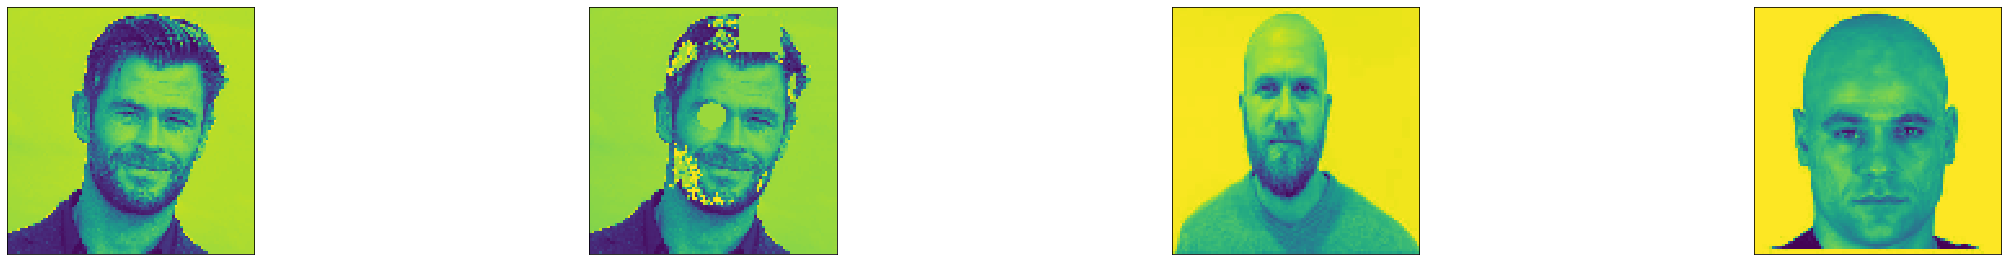

In [21]:
n = 4# how many digits we will display
plt.figure(figsize=(40,10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

###Autoencoder model prediction with new data set

In [0]:
new_input = autoencoder.predict(new_data, batch_size=1)



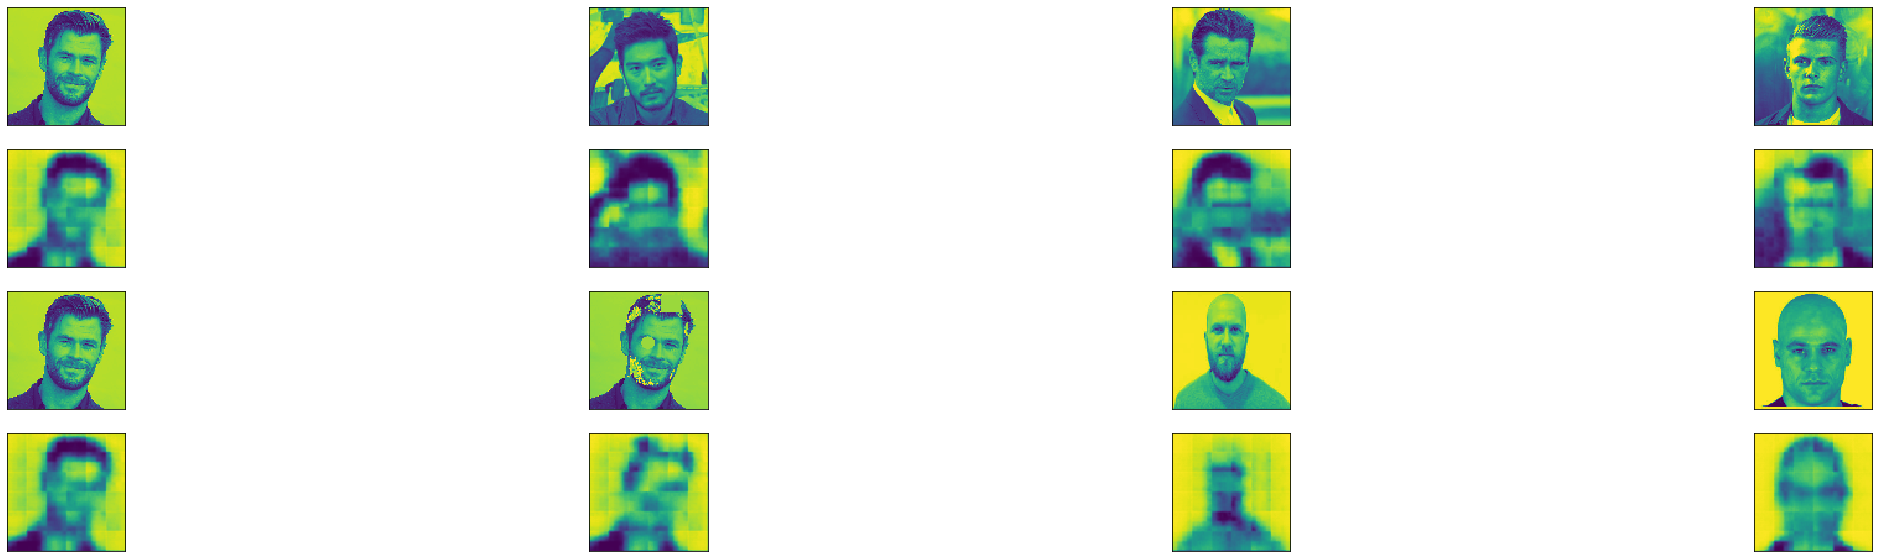

In [23]:
#Display

n = 4# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # dispay reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(recon_imgs[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input prediction
    ax = plt.subplot(4, n, i + 1 + n + n + n)
    plt.imshow(new_input[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

###Building Variational Autoencoder

In [24]:
#Encoding  - mapping image inputs to latent distribution parameters
latent_dim = 2



input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format


x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

shape_before_flattening = K.int_shape(encoded)

x = Flatten()(encoded)
encoded_to_z = Dense(32, activation='relu')(x)


#Tow outputs, latent mean and (log) variance
z_mean = Dense(latent_dim)(encoded_to_z)
z_log_var = Dense(latent_dim)(encoded_to_z)

print(z_mean)
print(z_log_var)

Tensor("dense_2/BiasAdd:0", shape=(?, 2), dtype=float32)
Tensor("dense_3/BiasAdd:0", shape=(?, 2), dtype=float32)


In [25]:
# Using previous parameters to sample new similar points from the latent space

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(1,2), mean=0., stddev = 1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

print(z)
print(shape_before_flattening[1:])

Tensor("lambda_1/add:0", shape=(?, 2), dtype=float32)
(6, 6, 32)


In [0]:
#Decoding part - mapping sampled latent points back to reconstructed inputs
#Expand to 1152 total pixels
x = Dense(1152, activation='relu')(z)

#Reshape (6,6,32)
x = Reshape(shape_before_flattening[1:])(x)


#Decoder
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(32, (2,2),padding='same', activation='relu',strides=(2, 2))(x)

z_decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)


In [0]:
#a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.

def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_true, y_pred), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_var) + K.square(z_mean) - 1. - z_log_var, axis=1)
    
    return recon + kl


###Variational Autoencoder model

In [28]:
vae = Model(input_img, z_decoded)
vae.compile(optimizer='rmsprop', loss=vae_loss)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 96, 96, 128)  1280        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 48, 48, 128)  0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 48, 48, 64)   73792       max_pooling2d_5[0][0]            
__________________________________________________________________________________________________
max_poolin

In [29]:
vae.fit(train_data, train_data,
        shuffle=False,
        epochs=300,
        steps_per_epoch= int(len(train_data)/32),
        validation_steps= int(len(test_data)/32),
        validation_data=(test_data,test_data),verbose=1)

Train on 455 samples, validate on 86 samples
Epoch 1/300
14/14 [==============================] - 14s 1s/step - loss: 66.3958 - val_loss: 66.3179
Epoch 2/300
14/14 [==============================] - 11s 804ms/step - loss: 66.2112 - val_loss: 65.6202
Epoch 3/300
14/14 [==============================] - 11s 805ms/step - loss: 66.1588 - val_loss: 65.8671
Epoch 4/300
14/14 [==============================] - 11s 802ms/step - loss: 65.6890 - val_loss: 66.0363
Epoch 5/300
14/14 [==============================] - 11s 801ms/step - loss: 65.3342 - val_loss: 65.6563
Epoch 6/300
14/14 [==============================] - 11s 802ms/step - loss: 64.7765 - val_loss: 64.8648
Epoch 7/300
14/14 [==============================] - 11s 800ms/step - loss: 65.7169 - val_loss: 64.9711
Epoch 8/300
14/14 [==============================] - 11s 799ms/step - loss: 64.5939 - val_loss: 64.4097
Epoch 9/300
14/14 [==============================] - 11s 799ms/step - loss: 65.0229 - val_loss: 63.5241
Epoch 10/300
14/14 [==

In [30]:
#VAE performance
train_eva = vae.evaluate(train_data, train_data,steps=int(len(train_data)/32), verbose=0)
print("Train loss = %f" % (train_eva))
test_eva = vae.evaluate(test_data, test_data,steps=int(len(test_data)/32),verbose=0)
print("Test loss = %f" % (test_eva))

Train loss = 61.490174
Test loss = 61.201279


In [0]:
vae.save('vae_h1')

###VAE prediction from test data

In [32]:
result_imgs1 = vae.predict(test_data, batch_size = int(len(test_data)/32), verbose=1)


86/86 [==============================] - 0s 4ms/step


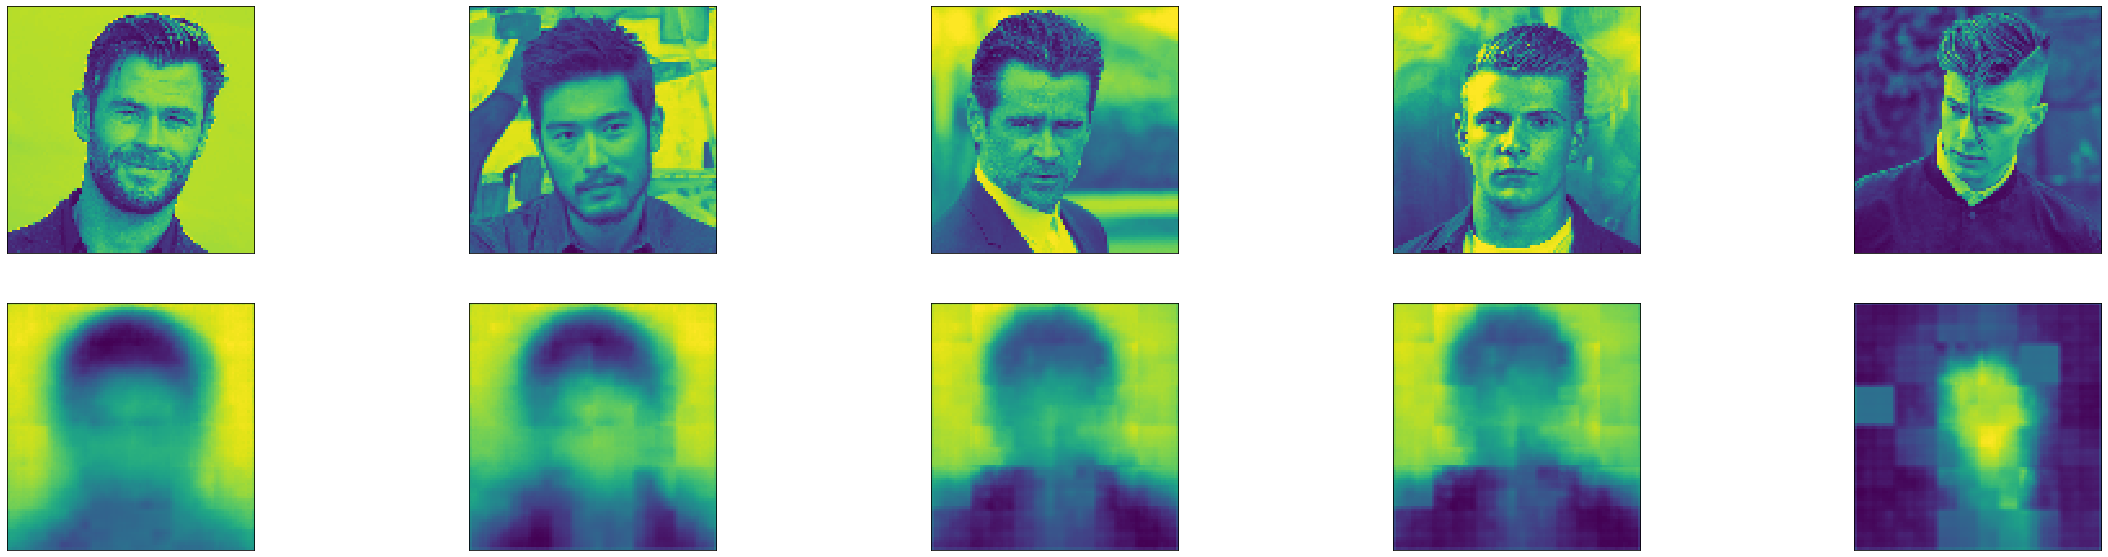

In [33]:


n = 5# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### VAE prediction from new test data

In [0]:
new_input1 = vae.predict(new_data, batch_size=1)


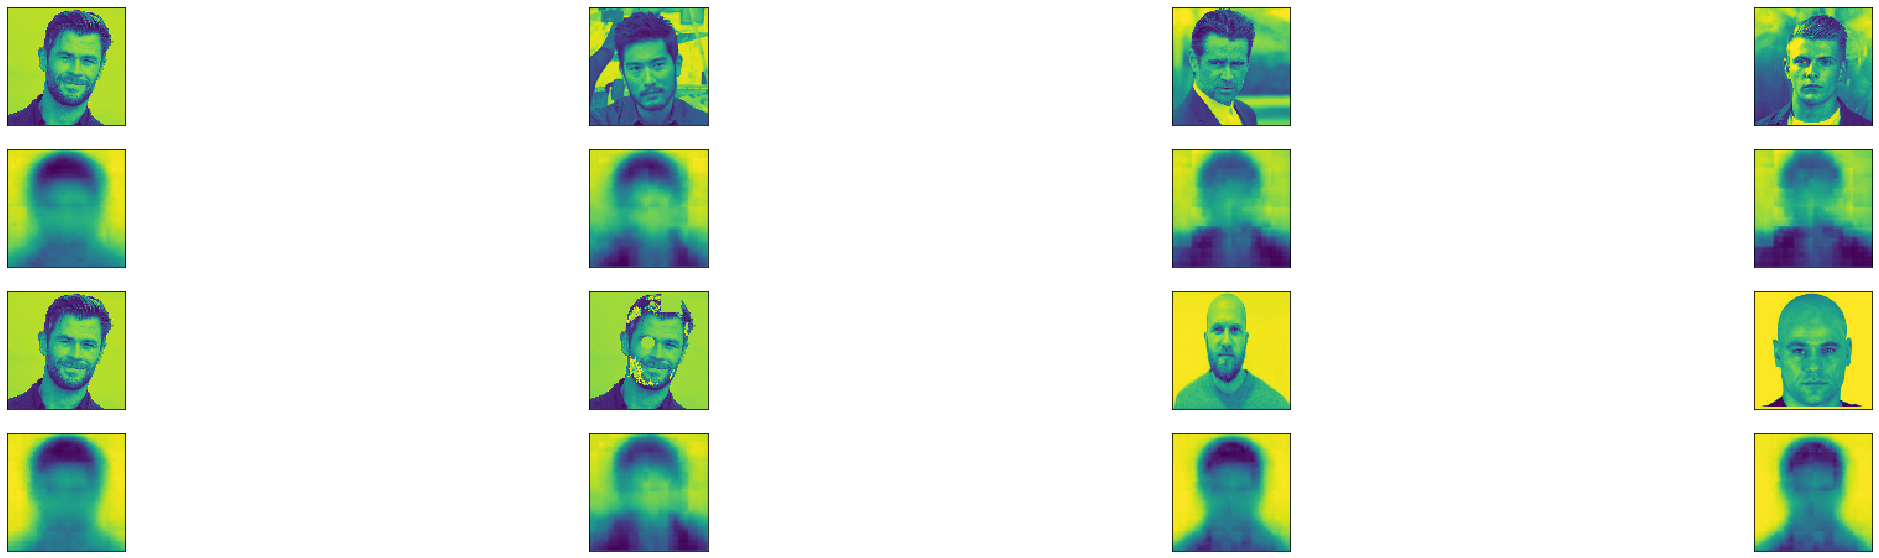

In [35]:
n = 4# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # dispay reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     # new input prediction
    ax = plt.subplot(4, n, i + 1 + n + n + n)
    plt.imshow(new_input1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

###Loss plots

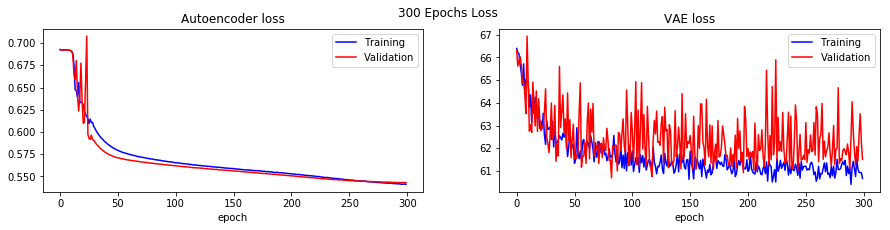

In [36]:
loss = [autoencoder.history.history['loss'],autoencoder.history.history['val_loss']]
loss1 = [vae.history.history['loss'],vae.history.history['val_loss']]
    
fig, axes = plt.subplots(1,2,figsize = (15,3))
fig.suptitle('300 Epochs Loss' )
for ax,val,name in zip(axes,(loss,loss1),['Autoencoder loss','VAE loss']):
        ax.plot(val[0], color='b', label="Training")
        ax.plot(val[1], color='r', label="Validation")
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(name)